# Text Classification with 20 newsgroups dataset
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

See also: http://qwone.com/~jason/20Newsgroups/

For simplification purpose, we take only a sub-set of the groups.

In [37]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, remove=('headers', 'footers', 'quotes'), random_state=0)

In [2]:
#Check target names
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [3]:
#Number of elements
len(twenty_train.data)

2257

In [4]:
#Display a sample of messages
n=3
for i in range(3):
    print('Message : ',twenty_train.data[i].split("\n"))
    print('From : ',twenty_train.target_names[twenty_train.target[i]])

Message :  ['', 'John, ', '', 'While I will not take the time to rebut you point by point, I will suggest', 'three current works which I think will be helpful in your quest to answer', 'this question.  John Dominic Crossan (Professor of Religion at De Paul Univ)-', '_The Cross That Spoke_ Harper and Row Pub. 1988, Also his latest work ', '_The Historical Jesus - The Life of A Mediterranean Jewish Peasant_ Harper', 'and Row Pub. 1991,  Also two works of Burton Mack (Professor of New Testament', 'at the Claremont Graduate School) _A Myth of Innocence_ Fortress Press 1988,', 'And his latest book _The Lost Gospel: The Book of Q and Christian Origins_', "Harper and Row, 1992.  You might start with Mack's book on Q and then ", 'examine the others afterward.  However I think that once you do that you will', 'see that your "evidence" is not as sturdy as you\'d like.  Most of the tired', 'arguements you stated, assume eyewitness accounts, such is not the case. But', 'Anyway look at Mack and Cro

In [38]:
#All in one: tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', lowercase=True,
                             norm='l2', use_idf=True)
X_train_tfidf = vectorizer.fit_transform(twenty_train.data)
X_train_tfidf.shape

(2257, 28865)

In [6]:
X_train_tfidf[:,0]

<2257x1 sparse matrix of type '<class 'numpy.float64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [5]:
#sample of words
import random
random.sample(vectorizer.get_feature_names(),50)

['1640',
 '_peacably_',
 'acquaintance',
 '680x0',
 'charlatans',
 'cancel',
 'raids',
 'adventures',
 'irreligious',
 'governments',
 'realised',
 'igs',
 'typeface',
 'cernapo',
 'mein',
 'linux',
 'log',
 'kg',
 'signifigantly',
 'martyr',
 'ofcourse',
 'silico',
 'predicts',
 'archimedes',
 'mapgen',
 'racowsky',
 'esprit',
 'vulnerable',
 'violent',
 'choises',
 'coincidence',
 'brittle',
 'almost',
 'gist',
 'lesson',
 'independently',
 'sumofedgedisplacements',
 'electric',
 'nobel',
 'contributor',
 'intervals',
 'sallantin',
 'flyover',
 'cbf',
 '785',
 'bedrock',
 '198',
 'xwdtopnm',
 '1994',
 'twelve']

In [39]:
#Deprecated 2 steps
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape


(2257, 28865)

In [112]:
print(count_vect.get_feature_names()[-50:])

['zebras', 'zech', 'zechariah', 'zeit', 'zeitgeist', 'zeitschrift', 'zeke', 'zen', 'zenith', 'zentrum', 'zephyr', 'zero', 'zero_', 'zeroed', 'zhang', 'zhou', 'zilch', 'zillions', 'zimmerman', 'zinc', 'zion', 'zionist', 'zip', 'zipped', 'zippy', 'zlumber', 'zoerasterism', 'zoloft', 'zombie', 'zonal', 'zoo', 'zooid', 'zoom', 'zooming', 'zooms', 'zopfi', 'zorasterism', 'zorg', 'zorn', 'zsoft', 'zubkoff', 'zues', 'zug', 'zur', 'zurich', 'zus', 'zvi', 'zyxel', 'zz', 'zzz']


In [113]:
count_vect.vocabulary_.get(u'algorithm')

2783

In [114]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 28865)

In [119]:
## Training a classifier

In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
#clf = LogisticRegression(penalty="l2", C=0.1)
mloss = 'modified_huber' #Updated loss to have predict_proba
mloss = 'hinge'
clf = SGDClassifier(loss=mloss, penalty='l2',
                    alpha=1e-4, random_state=0,
                    max_iter=50, tol=None)
clf.fit(X_train_tfidf, twenty_train.target)

SGDClassifier(max_iter=50, random_state=0, tol=None)

In [6]:
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import SGDClassifier
clf = LogisticRegression(penalty="l2", C=0.1)
#mloss = 'modified_huber' #Updated loss to have predict_proba
clf.fit(X_train_tfidf, twenty_train.target)

LogisticRegression(C=0.1)

In [19]:
#Not used
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_tfidf, twenty_train.target)

RandomForestClassifier(random_state=0)

In [19]:
clf

SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=5, random_state=0,
              tol=None)

In [20]:
clf.score(X_train_tfidf, twenty_train.target)

0.9818342933097032

In [21]:
#Test with 2 sample messages
docs_new = ['God is love', 'OpenGL on the GPU is fast']
#X_new_counts = count_vect.transform(docs_new)
#X_new_tfidf = tfidf_transformer.transform(X_new_counts)
X_new_tfidf = vectorizer.transform(docs_new)

predicted = clf.predict(X_new_tfidf)
proba = clf.predict_proba(X_new_tfidf)

predicted

array([3, 1], dtype=int64)

In [22]:
for i in range(len(docs_new)):
    print(f'{docs_new[i]} => {predicted[i]} ({twenty_train.target_names[predicted[i]]}) with proba: {proba[i]}')

God is love => 3 (soc.religion.christian) with proba: [0.07008843 0.         0.         0.92991157]
OpenGL on the GPU is fast => 1 (comp.graphics) with proba: [0.15627403 0.46863125 0.26210471 0.11299001]


In [135]:
#display prediction
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [42]:
prep = count_vect.build_preprocessor()
prep(docs_new[0])

'god is love'

In [43]:
tokenize = count_vect.build_tokenizer()
tokenize(prep(docs_new[0]))

['god', 'is', 'love']

In [146]:
## Explanation with SHAP

In [55]:
import shap
shap.__version__

'0.37.0'

In [9]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(clf, X_train_tfidf)

#explainer = shap.Explainer(clf, X_train_tfidf)


The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [35]:
import shap
algorithm='permutation'
algorithm='kernel'
explainer = shap.Explainer(clf, X_train_tfidf, algorithm=algorithm, feature_names=vectorizer.get_feature_names(),output_names=twenty_train.target_names)
#explainer = shap.Explainer(clf, X_train_tfidf, link=shap.links.identity)
#explainer = shap.Explainer(clf, X_train_tfidf, link=shap.links.logit)

Exception: Unknown algorithm type passed: kernel!

In [33]:
explainer

In [15]:
#np.isnan(X_train_tfidf[:,:100])
type(X_train_tfidf[:,:100])
X_train_tfidf[:,:10].toarray().shape

(2257, 10)

In [ ]:
#If Random Forest
explainer = shap.TreeExplainer(clf, data=X_train_tfidf[:,:10].toarray())

In [13]:
shap.sample(X_train_tfidf, 100)
explainer = shap.KernelExplainer(clf.predict_proba, data=shap.sample(X_train_tfidf, 100), link="identity")

In [ ]:
explainer = shap.KernelExplainer(clf.predict_proba, data=X_train_tfidf, link="identity")

In [188]:
explainer = shap.KernelExplainer(clf.predict_proba, data=X_train_tfidf, link="identity")


Using 2257 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [26]:
len(explainer.expected_value)

4

In [27]:
for i in range(4):
    print(f"Expected value for class {i}: {explainer.expected_value[i]:.3}")

Expected value for class 0: -0.683
Expected value for class 1: -0.503
Expected value for class 2: -0.57
Expected value for class 3: -0.491


In [ ]:
shap.sample

In [83]:
i = 0
X_test_array = X_new_tfidf[i].toarray()
X_test_array
#shap_values = explainer.shap_values(X_test_array)
shap_values = explainer.shap_values(X_new_tfidf[i])
shap_values

[array([[ 5.32022515e-05, -1.11329095e-04, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]]),
 array([[-1.00332307e-04,  3.10308013e-06, -0.00000000e+00, ...,
          0.00000000e+00, -0.00000000e+00, -0.00000000e+00]]),
 array([[ 2.53625633e-05,  3.51755804e-06,  0.00000000e+00, ...,
         -0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 2.17674918e-05,  1.04708457e-04, -0.00000000e+00, ...,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])]

In [165]:
len(shap_values)
shap_values[0].shape
len(shap_values[0].reshape(1,-1))
#len(shap_values[0].shape)


1

In [28]:
i = 0
X_test_array = X_new_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)
#len(shap_values)
max_display = 5
c = 3
explainer.expected_value[c]
shap_values[c].shape
#len(shap_values[c].shape)
#shap_values[c].flatten().shape
#len(shap_values[c].flatten().shape)
shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                feature_names=vectorizer.get_feature_names())

In [29]:
c=2
shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                feature_names=vectorizer.get_feature_names())

In [30]:
#Second example elt
i = 1
X_test_array = X_new_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)
#len(shap_values)
max_display = 5
c = 1
explainer.expected_value[c]
shap_values[c].shape
#len(shap_values[c].shape)
#shap_values[c].flatten().shape
#len(shap_values[c].flatten().shape)
shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                feature_names=vectorizer.get_feature_names())

In [31]:
c=2
shap.force_plot(explainer.expected_value[c],shap_values[c], X_test_array,
                feature_names=vectorizer.get_feature_names())

In [87]:
i = 0
X_test_array = X_new_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)
max_display = 5
c = 3
shap.waterfall_plot(explainer.expected_value[3], shap_values[3].flatten(), X_test_array)

AttributeError: 'numpy.float64' object has no attribute 'base_values'

In [107]:
shap.waterfall_plot(shap_values[3], max_display = 5)

AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [32]:
i = 0
X_test_array = X_new_tfidf[i].toarray() #Convert sparse to dense array
shap_values = explainer.shap_values(X_test_array)
max_display = 5
c = 3
shap.force_plot(explainer.expected_value[3], shap_values[3], X_test_array,
                    feature_names=vectorizer.get_feature_names())

In [186]:
# Basic display of the most contributing features (based on shap values)
# This is basically a textual version of Shap waterfall_plot
def basic_explain(shap_values, features, expected_value, max_display = 7, print_pred = False):
    feature_names = list(features.index)
    feature_order = np.argsort(-np.abs(shap_values))
    feature_inds = feature_order[:max_display]
    pred = expected_value + np.sum(shap_values)
    cum_contrib = 0
    if print_pred:
        print(f"Prediction is: {pred:.2}\n")
    print("Most contributing features* :")
    for i in feature_inds:
        cum_contrib += shap_values[i]
        s=f"{feature_names[i]}={features[i]:.3}"
        print(f"{s:>30}  -> {shap_values[i]:.2}")                
    s=f"{len(shap_values)-max_display} other features"
    print(f"{s:>30}  -> {np.sum(shap_values)-cum_contrib:.2}")
    print(f"\n* compared to avg pred : {expected_value:.2}")

In [187]:
#Explain proba for class 1
max_display = 8
c=3
#print(f"Features contributions to have proba of {proba[0][1]} for class 1 (benign) for this data:\n")
basic_explain(shap_values[c], X_test_array, explainer.expected_value[c], max_display=max_display)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [94]:
shap_values = explainer.shap_values(X_new_tfidf)

In [156]:
len(shap_values)

4

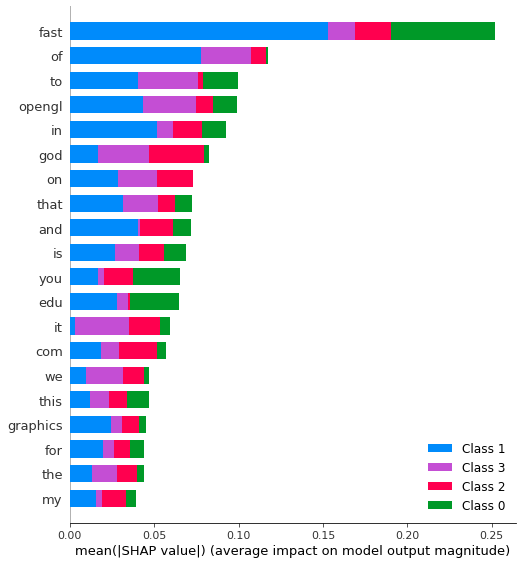

In [96]:
X_test_array = X_new_tfidf.toarray() # we need to pass a dense version for the plotting functions
shap.summary_plot(shap_values, X_test_array, feature_names=count_vect.get_feature_names())

In [85]:
#For a single element
idx = 1
docs_new[idx]
X_new_counts = count_vect.transform([docs_new[idx]])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
X_new_tfidf.shape

(1, 35788)

In [82]:
list(docs_new[idx])

['O',
 'p',
 'e',
 'n',
 'G',
 'L',
 ' ',
 'o',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'G',
 'P',
 'U',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'a',
 's',
 't']

In [84]:
ind = 0
shap.waterfall_plot(
    explainer.expected_value[0], shap_values[ind], X_test_array[ind],
    feature_names=count_vect.get_feature_names()
)

Exception: The waterfall_plot can currently only plot a single explanation but a matrix of explanations was passed!